### NetFlix Dataset Exploration
Tasks to perform:
1. Analysis which year has more type("TV Show or Movies").
2. Number of movies produced by directors.
3. Content available in different countries.
4. Countries with max and min Movie and TV Show

### Information of columns:
1. show_id:  Unique Id
2. type: Identifier - A Movie or TV Show
3. title: Title of the Movie / Tv Show
4. director: Director of the Movie
5. cast: Actors involved in the movie / show
6. country: Country where the movie / show was produced
7. date_added: Date it was added on Netflix
8. release_year: Actual Release year of the move / show
9. rating: TV Rating of the movie / show
10. duration: Total Duration - in minutes or number of seasons
11. listed_in: Genere
12. description: Description


### Import necessary libraries

In [179]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Data Analysis

In [180]:
dataset = pd.read_csv("netflix_titles.csv")
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [254]:
dataset.info()  # Check datatypes of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [255]:
dataset.shape # Check number of rows and columns

(7787, 12)

#### Total number of record: 7787

In [183]:
dataset.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

#### Columns with null values:
1. director: 31%
2. cast: 9%
3. country: 6.5%
4. rating: 0.001%

# Task1: Analysis which year has more type("TV Show or Movies").

In [184]:
task1_dataset = dataset.copy()      # Take copy of dataset, so our original will remain unchanged

#### Column required for analysis of task1: Type and release_year

#### Step 1: Check whether type and release_year have any null values

In [256]:
task1_dataset.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

#### Step 2: Analyse the data

In [186]:
task1_dataset[['type', 'release_year']]

,type,release_year
0,TV Show,2020
1,Movie,2016
2,Movie,2011
3,Movie,2009
4,Movie,2008
...,...,...
7782,Movie,2005
7783,Movie,2015
7784,Movie,2019
7785,TV Show,2019


<AxesSubplot:xlabel='type', ylabel='count'>

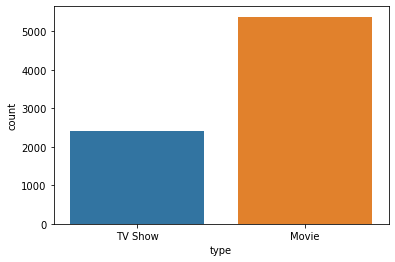

In [187]:
sns.countplot(x='type', data=task1_dataset)  ## Show the total number of movies and TV shows|

<AxesSubplot:xlabel='release_year', ylabel='type'>

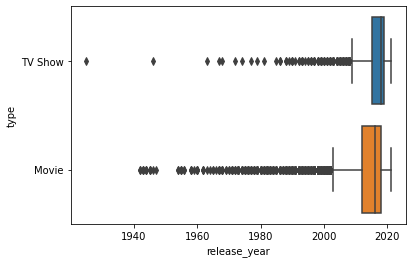

In [190]:
sns.boxplot(x='release_year', y='type', orient="h", data=task1_dataset)

### Conclusion for Task 1: 
1. The data for both TV Shows and Movies are left skewed.
2. The movies started increasing since year 2003 whereas TV Shows start increasing after 2010.
3. 50% of the TV shows are after 2017 wheras 50 percent of the movies are after 2016

# Task 2: Number of movies produced by directors

In [191]:
task2_dataset= dataset.copy()

In [192]:
task2_dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Step 1. Here we will consider columns: type, director, and release_year, so check whether they have null values

In [193]:
task2_dataset.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

### Step 2: As from the required column director column is having null values, handle missing value in that

In [194]:
task2_dataset[task2_dataset['director'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
11,s12,TV Show,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
16,s17,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."
19,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,"May 16, 2018",2017,TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th..."
24,s25,TV Show,​SAINT SEIYA: Knights of the Zodiac,NaN,"Bryson Baugus, Emily Neves, Blake Shepard, Pat...",Japan,"January 23, 2020",2020,TV-14,2 Seasons,"Anime Series, International TV Shows",Seiya and the Knights of the Zodiac rise again...
...,...,...,...,...,...,...,...,...,...,...,...,...
7775,s7776,TV Show,Zoids Wild,NaN,"Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...",Japan,"August 14, 2020",2018,TV-Y7,1 Season,"Anime Series, Kids' TV",A quest for freedom and legendary treasure beg...
7777,s7778,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
7779,s7780,TV Show,Zona Rosa,NaN,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,"November 26, 2019",2019,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."


In [195]:
### Here we know there is no way to fill the NaN value, so let us fill with 'Missing' value
task2_dataset['director'].fillna('Missing', inplace=True)

In [196]:
task2_dataset.isna().sum()      #Now we can see all the directors are filled with 'Missing Values'

show_id           0
type              0
title             0
director          0
cast            718
country         507
date_added       10
release_year      0
rating            7
duration          0
listed_in         0
description       0
dtype: int64

In [197]:
task2_dataset[task2_dataset['type'] == 'TV Show']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Missing,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
11,s12,TV Show,1983,Missing,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
12,s13,TV Show,1994,Diego Enrique Osorno,NaN,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
16,s17,TV Show,Feb-09,Missing,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."
...,...,...,...,...,...,...,...,...,...,...,...,...
7767,s7768,TV Show,Zindagi Gulzar Hai,Missing,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."
7775,s7776,TV Show,Zoids Wild,Missing,"Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...",Japan,"August 14, 2020",2018,TV-Y7,1 Season,"Anime Series, Kids' TV",A quest for freedom and legendary treasure beg...
7777,s7778,TV Show,Zombie Dumb,Missing,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
7779,s7780,TV Show,Zona Rosa,Missing,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,"November 26, 2019",2019,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...


In [198]:
len(task2_dataset['director'].unique())

4050

### will do analysis of first five directors, as there are lots of unique directors near by 4000+

/Users/vikaspuri/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


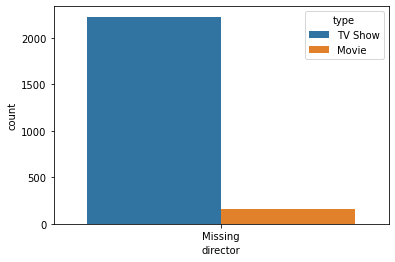

/Users/vikaspuri/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


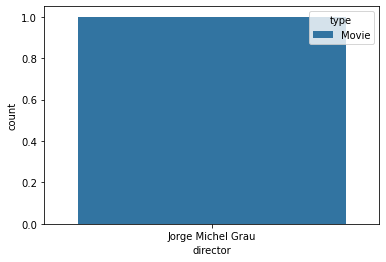

/Users/vikaspuri/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


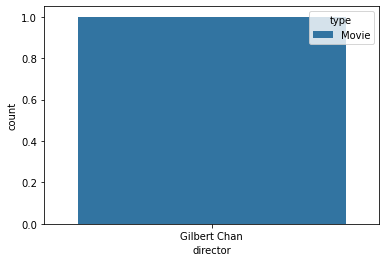

/Users/vikaspuri/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


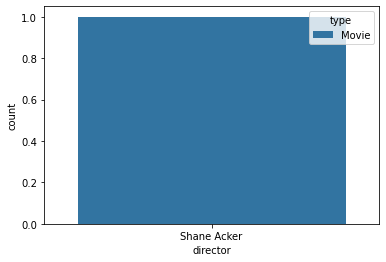

/Users/vikaspuri/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


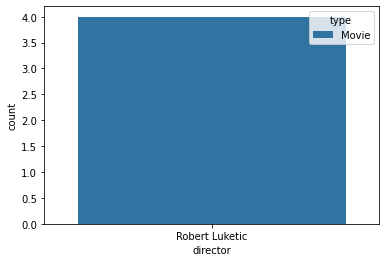

In [199]:
i = 0
for director_name in task2_dataset['director'].unique():
    if i == 5:
        break
    data_director = task2_dataset[task2_dataset['director'] == director_name]
    sns.countplot('director',hue='type', data=data_director)
    plt.show()
    i = i + 1
    

# Task3: Content available in different countries.

In [200]:
task3_dataset = dataset.copy()

In [201]:
task3_dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [202]:
## Columns required for contents in different countries: type, country, release_year

In [203]:
task3_dataset.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [204]:
## Out of required columns type, country, release_year, country is having 507 null entries
task3_dataset.shape

(7787, 12)

In [205]:
task3_dataset[task3_dataset['country'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
16,s17,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."
38,s39,TV Show,แผนร้ายนายเจ้าเล่ห์,NaN,"Chutavuth Pattarakampol, Sheranut Yusananda, N...",NaN,"March 30, 2019",2016,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...","When two brothers fall for two sisters, they q..."
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
97,s98,Movie,3 Deewarein,Nagesh Kukunoor,"Naseeruddin Shah, Jackie Shroff, Juhi Chawla, ...",NaN,"December 31, 2019",2003,TV-MA,121 min,"Dramas, International Movies, Thrillers",A reporter interviews three convicts on death ...
117,s118,Movie,5 Cowok Jagoan,Anggy Umbara,"Ario Bayu, Arifin Putra, Dwi Sasono, Muhadkly ...",NaN,"January 5, 2019",2017,TV-MA,106 min,"Action & Adventure, Comedies, International Mo...",Yanto asks his friends to help save a girlfrie...
...,...,...,...,...,...,...,...,...,...,...,...,...
7739,s7740,Movie,Your Excellency,Funke Akindele,"Akin Lewis, Funke Akindele, Kemi Lala Akindoju...",NaN,"July 10, 2020",2019,TV-G,120 min,"Comedies, International Movies","Bumbling through politics, a billionaire busin..."
7746,s7747,TV Show,دفعة القاهرة,NaN,"Bashar al-Shatti, Fatima Al Safi, Maram Baloch...",NaN,"April 25, 2020",2019,TV-14,1 Season,"International TV Shows, TV Dramas",A group of women leaves Kuwait to attend unive...
7765,s7766,Movie,Zero Hour,Robert O. Peters,"Richard Mofe-Damijo, Alex Ekubo, Ali Nuhu, Rah...",NaN,"December 13, 2019",2018,TV-MA,89 min,"International Movies, Thrillers","After his father passes, the heir to a retail ..."
7777,s7778,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."


In [206]:
### Let us drop the rows with country as null as those entries are vary less as percentage of null is 7%

In [207]:
task3_dataset.dropna(subset=['country'], axis=0, inplace=True)

In [208]:
task3_dataset.isna().sum()  # Now we have removed the null countries values.

show_id            0
type               0
title              0
director        2087
cast             622
country            0
date_added         9
release_year       0
rating             6
duration           0
listed_in          0
description        0
dtype: int64

In [209]:
task3_dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [210]:
relevant_data = task3_dataset[['type', 'country', 'release_year']]

In [211]:
relevant_data.reset_index(inplace=True)
relevant_data.head(20)

,index,type,country,release_year
0,0,TV Show,Brazil,2020
1,1,Movie,Mexico,2016
2,2,Movie,Singapore,2011
3,3,Movie,United States,2009
4,4,Movie,United States,2008
5,5,TV Show,Turkey,2016
6,6,Movie,Egypt,2019
7,7,Movie,United States,1997
8,8,Movie,India,2019
9,9,Movie,India,2008


In [212]:
len(np.unique(relevant_data['country']))

681

In [213]:
np.unique(relevant_data['country']) # Now here is a complication like in country we dont have single country, it also have multiple countries

array(['Argentina', 'Argentina, Brazil, France, Poland, Germany, Denmark',
       'Argentina, Chile', 'Argentina, Chile, Peru', 'Argentina, France',
       'Argentina, France, United States, Germany, Qatar',
       'Argentina, Italy', 'Argentina, Spain', 'Argentina, United States',
       'Argentina, United States, Mexico', 'Argentina, Uruguay, Serbia',
       'Argentina, Uruguay, Spain, France', 'Australia',
       'Australia, Armenia, Japan, Jordan, Mexico, Mongolia, New Zealand, Philippines, South Africa, Sweden, United States, Uruguay',
       'Australia, Canada', 'Australia, France',
       'Australia, France, Ireland', 'Australia, India',
       'Australia, Iraq', 'Australia, New Zealand',
       'Australia, New Zealand, United States',
       'Australia, United Arab Emirates', 'Australia, United Kingdom',
       'Australia, United Kingdom, Canada',
       'Australia, United Kingdom, United Arab Emirates, Canada',
       'Australia, United Kingdom, United States, New Zealand, Ita

In [214]:
new_rows = []
for i in range(len(relevant_data)) :
    try:
        
        country_values = relevant_data.loc[i, "country"].split(',')
        if len(country_values) > 1:
            first_tym = True
            for value in country_values:
                if first_tym:
                    relevant_data.loc[i, "country"] = value
                    first_tym = False;
                else:
                    new = relevant_data.iloc[i]
                    new['country'] = value
                    new_rows.append(new)
    except:
        print('value at error is : ', i)
        
relevant_data.append(new_rows)

/Users/vikaspuri/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
<ipython-input-214-712691b6f616>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['country'] = value


,index,type,country,release_year
0,0,TV Show,Brazil,2020
1,1,Movie,Mexico,2016
2,2,Movie,Singapore,2011
3,3,Movie,United States,2009
4,4,Movie,United States,2008
...,...,...,...,...
7276,7782,Movie,United Kingdom,2005
7276,7782,Movie,Denmark,2005
7276,7782,Movie,Netherlands,2005
7279,7786,Movie,Canada,2019


Argentina


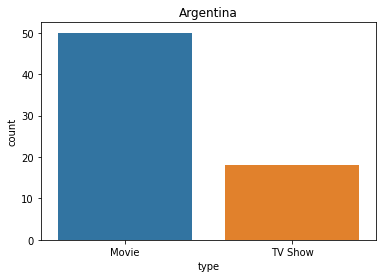

Australia


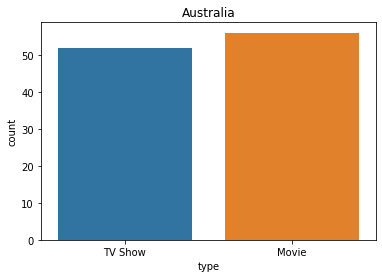

Austria


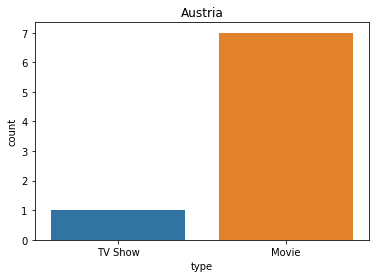

Bangladesh


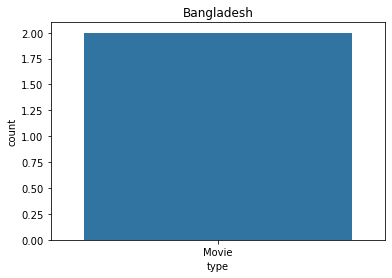

Belarus


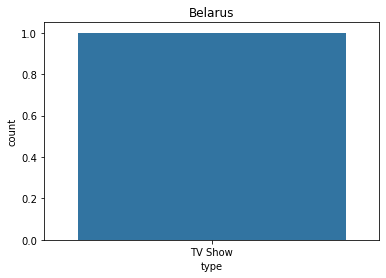

In [215]:
# As there are lot of countries, so just looked for few over here
i=0;
for country in np.unique(relevant_data['country']):
    if i == 5:
        break;
    i=i+1
    print(country)
    sns.countplot(x= 'type', data=relevant_data[relevant_data['country'] == country])
    plt.title(country)
    plt.show()
    
    

### Task 4: Countries with Maximum and Minimum movies and Tv shows

In [216]:
task4_dataset = dataset.copy()

In [217]:
task4_dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


#### Countries with maximum TV Shows and movies. Columns required are country and type

In [234]:
country_type_data = task4_dataset[['type', 'country']]

In [235]:
country_type_data.isna().sum() # Here we see country is having null values

type         0
country    507
dtype: int64

In [236]:
# As we can see we just have only 6.5 percent values of country as null, so we can drop those rows
percentage_country_null = (country_type_data[country_type_data['country'].isna()].shape[0]/country_type_data.shape[0]) * 100
percentage_country_null

6.51085141903172

In [237]:
country_type_data.dropna(axis=0, subset=['country'], inplace=True)

<ipython-input-237-b87970ca8fea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_type_data.dropna(axis=0, subset=['country'], inplace=True)


In [238]:
country_type_data.isna().sum() # we don't have any null values

type       0
country    0
dtype: int64

In [239]:
country_type_data.reset_index(inplace=True) # As we removed rows, so we need to reset index|

In [240]:
country_type_data.head()

,index,type,country
0,0,TV Show,Brazil
1,1,Movie,Mexico
2,2,Movie,Singapore
3,3,Movie,United States
4,4,Movie,United States


#### As previous tasks, here also country columns are having comma, so lets make them as new rows for comma seperated countries

In [241]:
new_rows = []
for i in range(len(country_type_data)) :
    try:
        
        country_values = country_type_data.loc[i, "country"].split(',')
        if len(country_values) > 1:
            first_tym = True
            for value in country_values:
                if first_tym:
                    country_type_data.loc[i, "country"] = value
                    first_tym = False;
                else:
                    new = country_type_data.iloc[i]
                    new['country'] = value
                    new_rows.append(new)
    except:
        print('value at error is : ', i)
        
country_type_data.append(new_rows)

/Users/vikaspuri/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
<ipython-input-241-5f7e53a892a3>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['country'] = value


,index,type,country
0,0,TV Show,Brazil
1,1,Movie,Mexico
2,2,Movie,Singapore
3,3,Movie,United States
4,4,Movie,United States
...,...,...,...
7276,7782,Movie,United Kingdom
7276,7782,Movie,Denmark
7276,7782,Movie,Netherlands
7279,7786,Movie,Canada


In [242]:
encoded_data = pd.get_dummies(country_type_data['type'])

In [243]:
country_type_data

,index,type,country
0,0,TV Show,Brazil
1,1,Movie,Mexico
2,2,Movie,Singapore
3,3,Movie,United States
4,4,Movie,United States
...,...,...,...
7275,7781,Movie,United States
7276,7782,Movie,Sweden
7277,7783,Movie,India
7278,7785,TV Show,Australia


In [244]:
country_type_data['Movie']=encoded_data['Movie']
country_type_data['TV Show']=encoded_data['TV Show']

<ipython-input-244-29f63c58fa6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_type_data['Movie']=encoded_data['Movie']
<ipython-input-244-29f63c58fa6c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_type_data['TV Show']=encoded_data['TV Show']


In [245]:
country_type_data.drop('type', axis=1, inplace=True)

/Users/vikaspuri/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [246]:
country_type_data

,index,country,Movie,TV Show
0,0,Brazil,0,1
1,1,Mexico,1,0
2,2,Singapore,1,0
3,3,United States,1,0
4,4,United States,1,0
...,...,...,...,...
7275,7781,United States,1,0
7276,7782,Sweden,1,0
7277,7783,India,1,0
7278,7785,Australia,0,1


In [247]:
grouped_data = country_type_data.groupby('country').sum()

### United States has maximum number of movies

In [249]:
grouped_data[grouped_data['Movie'] == grouped_data['Movie'].max()]

,index,Movie,TV Show
country,,,
United States,11353645,2100.0,783.0


#### There are 7 countries with no movies

In [251]:
grouped_data[grouped_data['Movie'] == grouped_data['Movie'].min()]

,index,Movie,TV Show
country,,,
Belarus,5885,0.0,1.0
Cyprus,5974,0.0,1.0
Jordan,3184,0.0,1.0
Mauritius,339,0.0,1.0
Puerto Rico,4461,0.0,1.0
Senegal,5349,0.0,1.0
Ukraine,12384,0.0,2.0


#### There are lot of countries with no "TV Show"

In [252]:
grouped_data[grouped_data['TV Show'] == grouped_data['TV Show'].min()]

,index,Movie,TV Show
country,,,
Bangladesh,9055,2.0,0.0
Bulgaria,4775,5.0,0.0
Cambodia,5301,2.0,0.0
Georgia,11256,2.0,0.0
Ghana,18504,4.0,0.0
Greece,6278,1.0,0.0
Guatemala,5497,1.0,0.0
Hungary,17188,4.0,0.0
Iran,224,1.0,0.0


#### United States is the country with maximum number of "TV Show"

In [253]:
grouped_data[grouped_data['TV Show'] == grouped_data['TV Show'].max()]

,index,Movie,TV Show
country,,,
United States,11353645,2100.0,783.0
